# Plotting and data analysis for lebwohl lasher project

<function matplotlib.pyplot.show(close=None, block=None)>

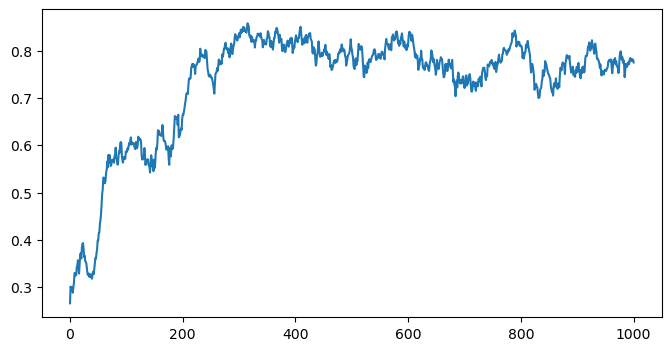

In [6]:
import pandas as pd
import matplotlib.pyplot as plt


filename = "outputs/1000_20_0.5.txt"

ll_df = pd.read_csv(filename, comment ="#", delim_whitespace=True,
                    names = ["Step", "Ratio", "Energy", "Order"])

plt.figure(figsize = (8,4))
plt.plot(ll_df["Step"], ll_df["Order"])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

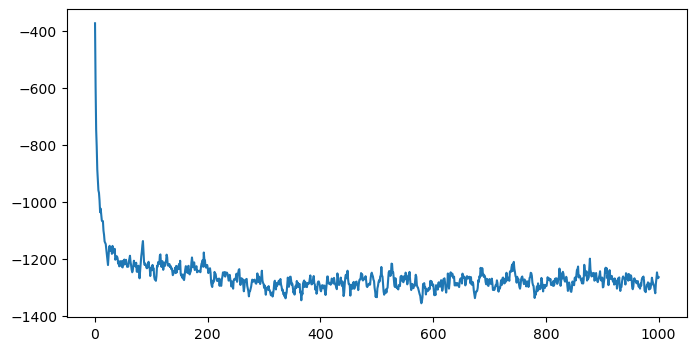

In [7]:
plt.figure(figsize = (8,4))
plt.plot(ll_df["Step"], ll_df["Energy"])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

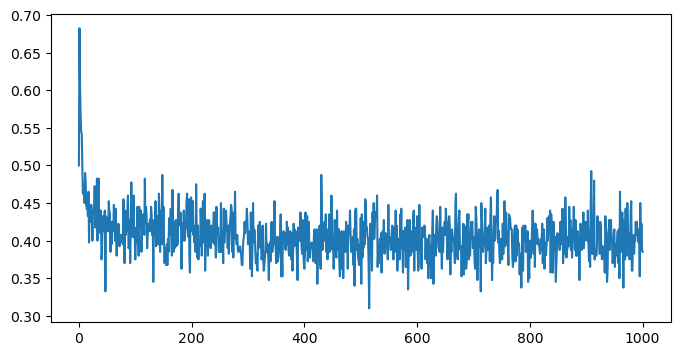

In [8]:
plt.figure(figsize = (8,4))
plt.plot(ll_df["Step"], ll_df["Ratio"])
plt.show